# 仮説検定

データを扱って何らかの議論をする際，気になるのは標本の数が十分か，そこから導かれる結論はどのぐらい信頼できるか，といったことではないだろうか．ここではそういったことを評価する各種指標について説明する．

## 仮説検定


ある仮説を立てたとき，その仮説に関して収集したデータから得られる結論は以下の4パターンがある．

|         <i></i>          | 仮説は正しい | 仮説は正しくない |
|--------------------------|--------------|------------------|
| データが仮説を支持する   | 正しい結論   | 誤った結論       |
| データが仮説を支持しない | 誤った結論   | 正しい結論       |

正しい仮説について，データがその仮説を支持するのであれば「仮説は正しい」という正しい結論が得られる．
一方で仮説が間違っていて，データがその仮説を支持しない場合も「仮説は間違っていた」という正しい結論が得られる．
仮説が正しくないのにデータがその仮説を支持してしまった場合，もしくは正しい仮説なのにデータがその仮説を支持しない
場合は誤った判断を下してしまうので問題である．


## 帰無仮説 (Null hypothesis)

**帰無仮説**とは，ある関連性や差が統計的に有意ではない，とする仮説のこと．
つまり標本から何らかの性質を想定したとき，その想定を無に帰せしむる仮説，ということ．
統計的仮説検定ではこの帰無仮説を棄却するかどうかを考える．帰無仮説が棄却されたとき，
つまり何らかの関連性や差が偶然ではなさそうなときに採択するものを**対立仮説 (Alternative hypothesis)** と呼ぶ．
帰無仮説に対立するから対立仮説である．

上の表を書き直すと，

|         <i></i>          | 帰無仮説は正しい | 帰無仮説は正しくない |
|--------------------------|------------------|----------------------|
| データが帰無仮説を支持する   | 真陰性 True Negative    | 偽陰性 False Negative       |
| データが帰無仮説を支持しない | 偽陽性 False Positive   | 真陽性 True Positive       |

帰無仮説を棄却する場合を**陽性 (Positive)**，採択する場合は**陰性 (Negative)**で，このときは対立仮説が採択される．
採択結果が正しい場合は**真 (True)**，正しくない場合は**偽 (False)** とする．
帰無仮説が採択されるか棄却されるかは問題ではなく，偽陽性・偽陰性を出さないことが重要になる．

例えば，ある母集団の性質を調べるときにどのぐらい標本 (データ) を用意すればよいかを考える．下のコードを実行すると分かるように，データの示す結果はけっこう母集団の性質 (ここでは平均値) からずれる．標本の数を多くすれば母集団の性質に近づいていくが，統計というのはだいたい「とてもじゃないけど母集団全部調べるのは無理」なときに「限られた数の(できれば少ない)標本で答えを**推定**したい」というものなので，どのぐらい標本をもってくればどのぐらいの正確さで母集団のことが分かるのか，が重要なのだ．

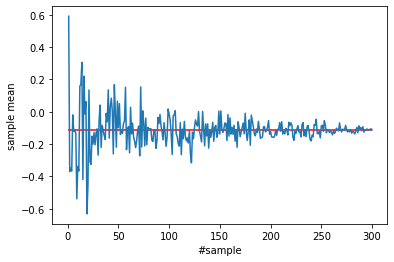

In [5]:
import numpy as np
from matplotlib import pyplot
%matplotlib inline

N=300

population = np.random.randn(N)
pmean = population.mean()

x = []
y = []

for s in range(1,N+1):
    sample = np.random.choice(population, s, replace=False)
    x.append(s)
    y.append(sample.mean())
    
pyplot.xlabel("#sample")
pyplot.ylabel("sample mean")
pyplot.plot(x,y)
pyplot.hlines([pmean], 0, N, "red")
pyplot.show()



## あわて者

帰無仮説が正しいにも関わらず，帰無仮説を棄却してしまうのを**第1種の誤り**と呼び，**あわて者の誤り** とも言う．$\alpha$過誤と言ったり偽陽性と言ったりもする．要は早とちりによる誤りである．

- **検証したい事象**：ある人はコイントスで表を多く出すことができる
- **帰無仮説**：表と裏が同じ確率で出る

普通に考えてコイントスを制御できる人はたぶんいないので，データは帰無仮説を支持するはずである．
表の出る確率を求めて，それが50%に近いかどうかで検証すればよいのだが，その確率を求める際の試行回数によって
結論がどう変わるかを試してみよう．

ぴったり50%にはならないだろうから，とりあえず表の出る確率が45%～55%なら表と裏はだいたい均等に出ると考えることにする．
つまり，標本中で表の出る確率が45%～55%であれば帰無仮説を採択し，それ以外であれば帰無仮説を棄却 (reject) する (つまり，対立仮説を採択する，偽陽性に陥る)．

標本数$N_s$をどのぐらいにすれば偽陽性を0にすることができるだろうか？

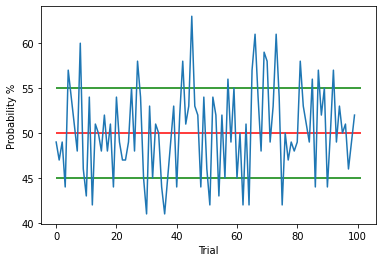

True negative:  69 / 100 (69.0%)
False positive: 31 / 100 (31.0%)


In [11]:
import numpy as np
from matplotlib import pyplot

x = []
y = []

#---- パラメータ ----
# Ns : 標本数 (コイントスの回数)
Ns=100
#------------------

# Nt : 試行回数
Nt=100
reject = 0

for t in range(Nt):
    omote=0
    for i in range(Ns):
        if np.random.rand() < 0.5:
            omote += 1
    
    if omote / Ns < 0.45 or omote / Ns > 0.55:
        reject += 1
        
    x.append(t)
    y.append(omote / Ns * 100)

pyplot.plot(x,y)
pyplot.hlines([50],0,Nt+1,"red")
pyplot.hlines([45,55],0,Nt+1,"green")
pyplot.xlabel("Trial")
pyplot.ylabel("Probability %")
pyplot.show()

print("True negative:  %d / %d (%.1f%%)" % ((Nt - reject), Nt, (Nt - reject)/Nt * 100))
print("False positive: %d / %d (%.1f%%)" % (reject, Nt, reject/Nt*100))


十分な標本数$N_s$を取らないと，第1種の誤りが増える．これは標本群の性質が大数の法則によって母集団の性質に近づいていない段階で帰無仮説を棄却してしまったことで起こる．つまるところ十分な標本を集める前に**早とちり**したということなので，「あわて者の誤り」と呼ばれるのである．

## ぼんやり者

一方で帰無仮説が正しくないにも関わらず，仮説を棄却しないことが**第2種の誤り**であり，**ぼんやり者の誤り**と呼ぶ．$\beta$過誤とか偽陰性とも言う．

標本数が少ないときに**早とちり**しないように，60%までは帰無仮説を棄却しないことにしてみる．
ところが，超能力かイカサマかはさておき，実際にコインの表を2/3の確率で出せる人がいたとするとどうなるか，
試してみよう．当然，この場合は帰無仮説は**棄却されない**のが正しい (真陽性)．


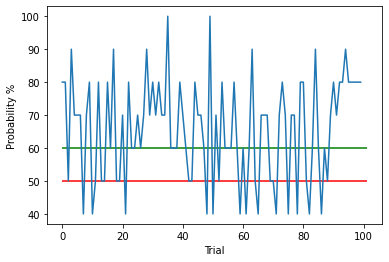


False negative:  45 / 100 (45.0%)
True positive: 55 / 100 (55.0%)


In [13]:
#---- パラメータ ----
# Ns : 標本数 (コイントスの回数)
Ns=10
#------------------

# Nt : 試行回数
Nt=100
reject = 0

x = []
y = []

for t in range(Nt):
    omote=0
    for i in range(Ns):
        if np.random.rand() < 0.66:
            omote += 1
    
    if omote / Ns > 0.60:
        reject += 1
    
    x.append(t)
    y.append(omote / Ns * 100)

pyplot.plot(x,y)
pyplot.hlines([50],0,Nt+1,"red")
pyplot.hlines([60],0,Nt+1,"green")
pyplot.xlabel("Trial")
pyplot.ylabel("Probability %")
pyplot.show()

print("")
print("False negative:  %d / %d (%.1f%%)" % ((Nt - reject), Nt, (Nt - reject)/Nt * 100))
print("True positive: %d / %d (%.1f%%)" % (reject, Nt, reject/Nt*100))

今度は，標本数が少ないときに，本来棄却できないはずの帰無仮説を棄却してしまう (**偽陽性**) ことが多くなる．

こちらは，実際に表が多く出ているにも関わらず，それを「偶然」で片づけることで生じる誤りである．これが賭け事なら，帰無仮説が棄却できないことに気付くまで**カモにされ続ける**ということだ．**ぼんやりしている**と言われても仕方あるまい．

## あわて者とぼんやり者

薄々気付いていると思うが，あわて者になるかぼんやり者になるかは棄却の閾値をどうするかで変わる．
ではあわて者とぼんやり者の関係はどうなっているのだろうか．

第1種過誤 (あわて者，α過誤)を犯すの確率を$\alpha$，第2種過誤 (ぼんやり者，β過誤)を犯す確率を$\beta$とする．
上のコイントスの例では，帰無仮説棄却の閾値を上げれば$\alpha$が小さくなり，$\beta$が大きくなると想像できる．
極端な話，閾値を 1.0 にすれば帰無仮説を棄却することはないので，$\alpha = 0$となる．
一方で，たとえ100%の確率で表を出し続ける相手に対してもそれは「偶然」で片付けられてしまうので，$\beta = 1$となる．

コイントスの例で，実際に表の出る確率と棄却の閾値を変化させて，$\alpha$と$\beta$の関係を求めてみよう．

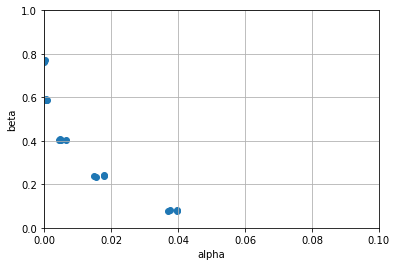

In [9]:
sample = [10]

threshold = np.arange(0, 0.5, 0.025)
prob = np.arange(0, 1, 0.05)
alpha = []
beta = []

Nt = 300

for th in threshold:
    for Ns in sample:
        ra = 0
        rb = 0
        for p in prob:
            for t in range(Nt):
                omote=0
                for i in range(Ns):
                    if np.random.rand() < p:
                        omote += 1
    
                if omote / Ns < (0.5 - th) or omote / Ns > (0.5 + th):
                    if p == 0.5:
                        ra += 1
                else:
                    if p!= 0.5:
                        rb += 1

        alpha.append(ra / (Nt * prob.size))
        beta.append(rb / (Nt * prob.size))

pyplot.grid()
pyplot.xlim([0,0.1])
pyplot.ylim([0,1])
pyplot.xlabel("alpha")
pyplot.ylabel("beta")
pyplot.scatter(alpha, beta)
pyplot.show()

## ROCカーブ

$\alpha$が増えると$\beta$は減る．どうやら1本の曲線上に乗りそうな雰囲気である．標本数 `sample` の値を変えると，曲線の形は変わるがやはり$\alpha$に対して$\beta$が単調減少する曲線に乗るという性質は同じようだ．


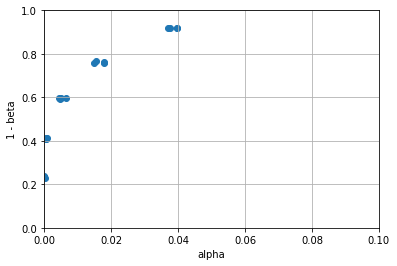

In [10]:
pyplot.grid()
pyplot.xlim([0,0.1])
pyplot.ylim([0,1])
pyplot.xlabel("alpha")
pyplot.ylabel("1 - beta")
pyplot.scatter(alpha, 1 - np.array(beta))
pyplot.show()

### Numpy での演算

$1-\beta$のグラフを作るところで，$\beta$の配列から $1 - \beta$の配列を作るのに `1 - np.array(beta)` と書いている．一見すると整数1と配列の演算でエラーになりそうなものだが，numpy はこういうことを書いても**よしなにやってくれる**．いろいろと強力なのでデータ処理では numpy を活用しよう．ちなみに `1 - np.array(beta)` でちゃんと計算ができるのは numpy の機能なので，Python標準の配列のまま `1 - beta` と書いてもエラーになる．`np.array()` は標準の配列から numpy の配列を作る関数である．基本的に numpy の配列は標準の配列の上位互換なので，最初から配列は全部 numpy で作っておく方が楽だ．

## 別の例

コイントスよりももうちょっと実用的な例で考えよう．ROCカーブはもともとレーダーで対象物を検出することを目的として考案された方法である．

次のコードはごく簡単にレーダーの受信結果を模擬する．検出対象を $N_t$個適当な位置に設定し，レーダーの受信結果 receive には対象物からの反射と雑音の重畳された結果が格納される．反射波と雑音の強さは正規分布に従うとする．このとき，検出の閾値 threshold はどう設定すればよいか，試してみよう．

注： RCS (Rader Cross Section，レーダー反射断面積)


#Traget: 10, True positive: 10 (100.0%), False Positive: 2 (0.0050%), False Negative: 0 (0.0%)


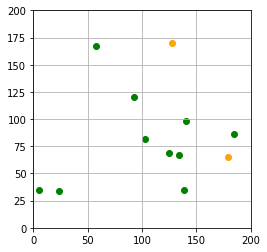

In [29]:
import numpy as np
import numpy.random
from matplotlib import pyplot

#---- パラメータ1 ----
# threshold : 検出閾値
threshold = 100

#---- パラメータ2 (条件設定) ----
RCS = 100 # target RCS

tsig = 10 # sigma of target reflection
bsig = 25 # sigma of background noise

Nt = 10 # Number of targets
area = 200 # grid size

#####################################################
# rader
#
def rader(threshold):
    global tpx, tpy
    global fpx, fpy
    global fnx, fny
    global ntp, nfp, nfn

    tpx = []
    tpy = []
    fpx = []
    fpy = []
    fnx = []
    fny = []

    # target position
    targetx = [0] * Nt
    targety = [0] * Nt
    for i in range(Nt):
        targetx[i] = np.random.randint(0, area)
        targety[i] = np.random.randint(0, area)

    # calculate received level
    receive = np.zeros(shape=(area, area))
    for x in range(area):
        for y in range(area):
            receive[x][y] = abs(np.random.normal(0, bsig))

    for i in range(Nt):
        receive[targetx[i]][targety[i]] += abs(np.random.normal(RCS, tsig))

    # judge
    px = []
    py = []
    for x in range(area):
        for y in range(area):
            if receive[x][y] >= threshold:
                px.append(x)
                py.append(y)

    # test
    for i in range(Nt):
        for j in range(len(px)):
            if targetx[i] == px[j] and targety[i] == py[j] and targetx[i] >= 0 and targety[i] >= 0:
                tpx.append(px[j])
                tpy.append(py[j])
                targetx[i] = -1
                targety[i] = -1
                px[j] = -1
                py[j] = -1

    fpx = [x for x in px if x >= 0 ]
    fpy = [y for y in py if y >= 0 ]
    fnx = [x for x in targetx if x >= 0 ]
    fny = [y for y in targety if y >= 0 ]

    ntp = len(tpx) # number of true positive
    nfp = len(fpx) # number of false positive
    nfn = len(fnx) # number of false negative

#end rader
###################################################################################

rader(threshold)

tpr = ntp / Nt * 100
fpr = nfp / (area * area - Nt) * 100
fnr = nfn / Nt * 100

print("#Traget: %d, True positive: %d (%.1f%%), False Positive: %d (%.4f%%), False Negative: %d (%.1f%%)" % (Nt, ntp, tpr, nfp, fpr, nfn, fnr))

# plot
pyplot.axes().set_aspect('equal')
pyplot.xlim([0, area])
pyplot.ylim([0, area])
pyplot.grid()
pyplot.scatter(tpx, tpy, c='green') # True Positive
pyplot.scatter(fpx, fpy, c='orange') # False Positive
pyplot.scatter(fnx, fny, c='red') # False Negative
pyplot.show()

緑が真陽性 (対象がいて，それを検出できた)，オレンジが偽陽性 (対象がいないのに検出した)，赤が偽陰性 (対象がいるのに検出しなかった) である．
各種設定を変えて，検出結果がどう変わるかを確認しよう．言うまでもなく，偽陰性が一番まずい．

パラメータ2の条件設定を変えても結果が変わる．ステルス戦闘機はRCSを下げるように作られており，RCSを下げていくと検出がほとんど不可能になることが分かるだろう．レーダーの性能が上がるのはこのコードでは bsig を下げる (雑音の影響を受けにくくなる) ことに対応する．

ちなみに，F-35のRCSはF-16の1000分の1ぐらいしかないし，F-22に至ってはそのさらに10分の1程度らしい．


上の実験を Nt 回繰り返して，真陽性・偽陽性・偽陰性の数をプロットすると以下のようになる (時間がかかるので注意)．

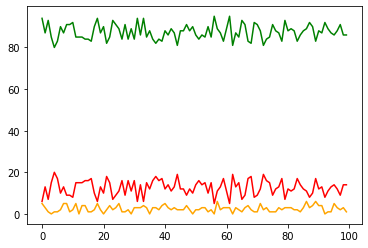

In [31]:
threshold = 100
RCS = 100

Nt = 100

tpr = []
fpr = []
fnr = []

for t in range(Nt):
    rader(threshold)

#    tpr.append( ntp / Nt * 100 )
#    fpr.append( nfp / (area * area - Nt) * 100 )
#    fnr.append( nfn / Nt * 100 )
    tpr.append( ntp )
    fpr.append( nfp )
    fnr.append( nfn )

pyplot.plot(range(Nt), tpr, color='green')
pyplot.plot(range(Nt), fpr, color='orange')
pyplot.plot(range(Nt), fnr, color='red')
pyplot.show()

もう少し身近な例として，検査による病気の検出がある．この場合でも偽陰性がまずい．下手をすると医療ミスで訴訟ものである．

- **基準比率** ; 母集団で実際に病気にかかっている割合
- **敏感度** : 病気にかかっていて，陽性と検出する確率
- **特異度** : 病気にかかっていない人を陰性と検出する確率

つまり，検査結果が陽性の人で実際に病気にかかっている人は
$$\frac{真陽性}{真陽性 + 偽陽性}$$
の割合で，条件付確率で表すと
$$\frac{基準率\ \times 敏感度}{基準率 \times 敏感度 + (1 - 基準率)\times(1 - 特異度)}$$
となる．

## 演習

敏感度，特異度を変えたときに，真陽性・偽陽性・偽陰性がどうなるか調べるコードを書こう．